## 分子指纹映射单个子结构

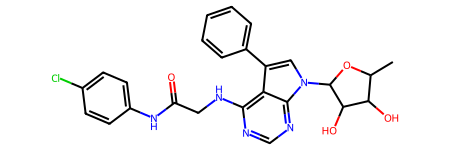

In [79]:
from rdkit import Chem
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import Draw
from PIL import Image 
smi = 'CC1OC(n2cc(-c3ccccc3)c3c(NCC(=O)Nc4ccc(Cl)cc4)ncnc32)C(O)C1O'    # 分子smiles
mol = Chem.MolFromSmiles(smi)
patt = Chem.MolFromSmarts('[*]1:[cH]:[cH]:[cH]:[cH]:[cH]:1') # 子结构的SMARTS
mol

In [80]:
# # 判断是否包含子结构
mol.HasSubstructMatch(patt)

True

In [81]:
# 搜索并返回子结构
hit_at = mol.GetSubstructMatch(patt) 
print(hit_at)
# 获取匹配的原子和索引
hit_bond = []
for bond in patt.GetBonds():
    aid1 = hit_at[bond.GetBeginAtomIdx()]
    aid2 = hit_at[bond.GetEndAtomIdx()]
    hit_bond.append(mol.GetBondBetweenAtoms(aid1, aid2).GetIdx())
hit_bond

(7, 8, 9, 10, 11, 12)


[7, 8, 9, 10, 11, 36]

In [82]:
# 定义高亮颜色
highlightAtomColors = {
    idx: (0.25, 0.61, 0.88) for idx in hit_at  # 红色 (RGB: 1.0, 0.0, 0.0)
}
highlightBondColors = {
    idx: (0.25, 0.61, 0.88) for idx in hit_bond  # 绿色 (RGB: 0.0, 1.0, 0.0)
}

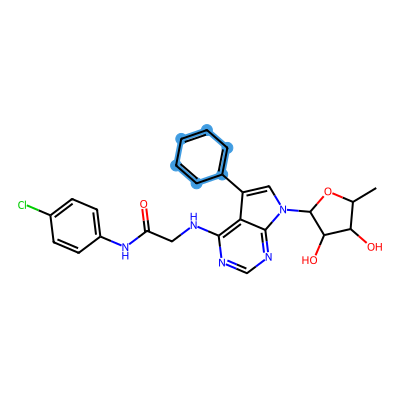

In [83]:
# 绘制分子和高亮子结构
d = rdMolDraw2D.MolDraw2DCairo(400, 400)  # 图像大小
rdMolDraw2D.PrepareAndDrawMolecule(
    d, mol, 
    highlightAtoms=list(hit_at),
    highlightBonds=hit_bond,
    highlightAtomColors=highlightAtomColors,
    highlightBondColors=highlightBondColors
)

# 完成绘制并保存图像
d.FinishDrawing()
d.WriteDrawingText('./number10/2.png')  # 保存图像
img = Image.open('./number10/2.png')
img # 显示图像